# 2.Uždavinys 

Antrojo laipsnio splainas - tai splainas, kuriame daugianariai:
$$ P_i^1(x) = \sum_{k=0}^1 = a_0^{(i)} + a_1^{(i)}x + a_2^{(i)}x^2$$

Iš daugianarių sudarius kelias sistemas ir jas išsprendus gauname kintamųjų reikšmes:


$$ a_0 = \frac{1}{\Delta_0} \cdot 
\begin{vmatrix} 
y_0 & x_0 & (x_0)^2 \\ 
y_1 & x_1 & (x_1)^2 \\
d_0 & 1 & 2x_0
\end{vmatrix}  $$

$$ a_1 = \frac{1}{\Delta_0} \cdot 
\begin{vmatrix} 
1 & y_0 & (x_0)^2 \\ 
1 & y_1 & (x_1)^2 \\
0 & d_0 & 2x_0
\end{vmatrix}  $$

$$ a_2 = \frac{1}{\Delta_0} \cdot 
\begin{vmatrix} 
1 & x_0 & y_0 \\ 
1 & x_1 & y_1 \\
0 & 1 & d_0
\end{vmatrix}  $$

$$ a_{01} = \frac{1}{\Delta_1} \cdot 
\begin{vmatrix} 
y_1 & x_1 & (x_1)^2 \\ 
y_2 & x_2 & (x_2)^2 \\
d_1 & 1 & 2x_1
\end{vmatrix}  $$

$$ a_{11} = \frac{1}{\Delta_1} \cdot 
\begin{vmatrix} 
1 & y_1 & (x_1)^2 \\ 
1 & y_2 & (x_2)^2 \\
0 & d_1 & 2x_1
\end{vmatrix}  $$

$$ a_{21} = \frac{1}{\Delta_1} \cdot 
\begin{vmatrix} 
1 & x_1 & y_1 \\ 
1 & x_2 & y_2 \\
0 & 1 & d_1
\end{vmatrix}  $$

O matricų determinantai $\Delta_0$ ir $\Delta_1$ lygūs:
$$ \Delta_0 =  -(x_0 - x_1)^2  \quad \Delta_1 = -(x_1 - x_2)^2$$

### Sprendimas:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

In [18]:
x = np.array([0.1, 2, 3])
f = lambda t: 3*(np.tan(t)/t)
y = f(x)
d0 = -2

delta0 = -(x[0] - x[1])**2
delta1 = -(x[1] - x[2])**2

def a_0(X, Y, D0, d_0):
    a = [[Y[0], X[0], (X[0])**2], [Y[1], X[1], (X[1])**2], [d_0, 1, 2*X[0]]]
    return (1/D0) * np.linalg.det(a)

def a_1(X, Y, D0, d_0):
    a = [[1, Y[0], (X[0])**2], [1, Y[1], (X[1])**2], [0, d_0, 2*X[0]]]
    return (1/D0) * np.linalg.det(a)

def a_2(X, Y, D0, d_0):
    a = [[1, X[0], Y[0]], [1, X[1], Y[1]], [0, 1, d_0]]
    return (1/D0) * np.linalg.det(a)

def a_01(X, Y, D1, d_1):
    a = [[Y[1], X[1], (X[1]**2)], [Y[2], X[2], (X[2]**2)], [d_1, 1, 2*X[1]]]
    return (1/D1) * np.linalg.det(a)

def a_11(X, Y, D1, d_1):
    a = [[1, Y[1], (X[1]**2)], [1, Y[2], (X[2]**2)], [0, d_1, 2*X[1]]]
    return (1/D1) * np.linalg.det(a)

def a_21(X, Y, D1, d_1):
    a = [[1, X[1], Y[1]], [1, X[2], Y[2]], [0, 1, d_1]]
    return (1/D1) * np.linalg.det(a)
    
def plot_spline_f(t_0, t_1, t_, S_0, S_1, T_0, T_1, xlim_min, xlim_max):
    offset = 0.2
    plt.title("Antrojo laipsnio splaino interpoliavimas")
    #plt.axis([xlim_min - offset, xlim_max + offset, 0, 1]) #optional zooming in graph
    plt.plot(t_0, S_0, color='r')
    plt.plot(t_1, S_1, color='b')
    plt.plot(t, f(t), 'black', linestyle='dashed')
    plt.legend(('S0', 'S1', 'F'))
    plt.show()
    
def error_f(S, f):
    return S - f
    
def error_plot(_t, s_err):
    plt.title("Absoliutinė paklaida")
    plt.plot(_t, s_err)
    plt.axhline(y=0, color='black', linewidth=1)
    plt.show()

S(0.2) = 2.8031493039556064
S(0.7) = 1.5619692526787292


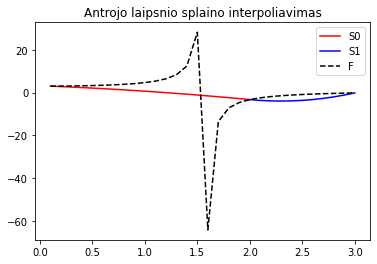

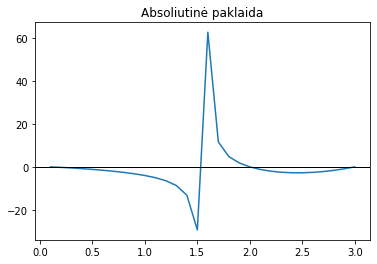

In [26]:
a0 = a_0(x, y, delta0, d0)
a1 = a_1(x, y, delta0, d0)
a2 = a_2(x, y, delta0, d0)

d1 = a1 + (2*a2*x[1])

a01 = a_01(x, y, delta1, d1)
a11 = a_11(x, y, delta1, d1)
a21 = a_21(x, y, delta1, d1)

t0 = np.arange(x[0], x[1]+0.1, 0.1)
t1 = np.arange(x[1], x[2]+0.1, 0.1)
t = np.arange(x[0], x[2]+0.1, 0.1)
S0 = lambda t: a0 + (a1 * t) + (a2*(t**2))
S1 = lambda t: a01 + (a11 * t) + (a21*(t**2))
T0 = lambda t: d0 * (t - x[0]) + y[0]
T1 = lambda t: d1 * (t - x[1]) + y[1]

print(f"S(0.2) = {S0(0.2)}")
print(f"S(0.7) = {S0(0.7)}")

plot_spline_f(t0, t1, t, S0(t0), S1(t1), T0(t), T1(t), x[0], x[-1])

S_err = np.concatenate((error_f(S0(t0), f(t0))[:-1], error_f(S1(t1), f(t1))))
error_plot(t, S_err)